# **Universidad del Norte**
## **Departamento de Ingeniería de Sistemas**
## IST7420 - Taller 1

*   Estudiantes: Kenny Zhu, Sets Salas
*   Códigos: 200164380

In [228]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex, display

## Ejercicio 1

Considera la función $f(x) = x^3 - 6x^2 + 9x$ en el intervalo $[-1, 5]$. Encuentra los valores de $x$ en los que $f(x)$ alcanza sus máximos y mínimos locales.

In [229]:
# Define la variable y la función
x = sp.Symbol('x')
f = x**3 - 6*x**2 + 9*x

# Encuentra la primera derivada
df = f.diff(x)

# Encuentra los puntos críticos resolviendo f'(x) = 0
critical_points = sp.solve(df, x)

# Filtrar los puntos críticos que están dentro del intervalo [-1,5]
critical_points = [point for point in critical_points if -1 <= point <= 5]

# Encuentra la segunda derivada
ddf = df.diff(x)

# Evalúa la segunda derivada en los puntos críticos para determinar si son máximos o mínimos
max_min = []
for point in critical_points:
    if ddf.subs(x, point) > 0:
        max_min.append((point, f.subs(x, point), "Mínimo"))
    elif ddf.subs(x, point) < 0:
        max_min.append((point, f.subs(x, point), "Máximo"))

for point, value, nature in max_min:
    print(f"x = {point}, f(x) = {value}, {nature}")

x = 1, f(x) = 4, Máximo
x = 3, f(x) = 0, Mínimo


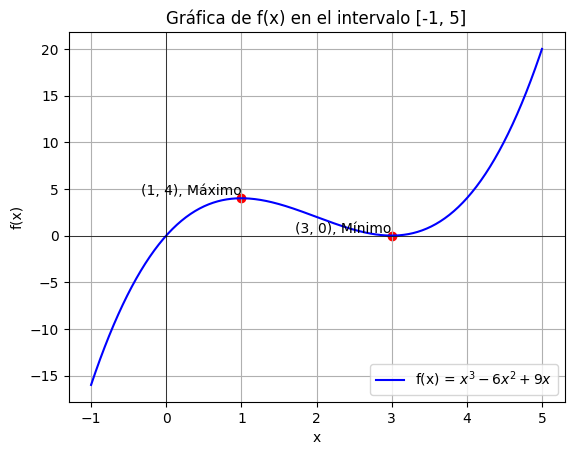

In [230]:
# Grafica la función en el intervalo [-1, 5]
f = sp.lambdify(x, f)
x_vals = np.linspace(-1, 5, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = $x^3 - 6x^2 + 9x$', color='blue')

for point, value, nature in max_min:
    plt.scatter(point, value, color='red')
    plt.text(point, value, f'({point}, {value}), {nature}', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.title('Gráfica de f(x) en el intervalo [-1, 5]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

## Ejercicio 2

Considera la función $f(x, y) = x^2 + 3xy + 2y^2$ en el plano $\mathbb{R}^2$. Encuentra todos los puntos críticos y utiliza las condiciones de primer y segundo orden para determinar su naturaleza.

In [231]:
def hessian(f, x, n):
    # Esta función devuelve la matriz hessiana de f
    H = sp.zeros(n)
    for i in range(0,n):
        for j in range(0,n):
            H[i, j] = sp.diff(f, x[i], x[j])
    return H

# Definimos la función
x, y = sp.symbols('x y')
f = x**2 + 3*x*y + 2*y**2

# Calculamos las primeras derivadas
f_x = sp.diff(f, x)
f_y = sp.diff(f, y)

# Encuentra los puntos críticos
solution = sp.solve([f_x, f_y], (x, y))

# Convertir la solución en una lista de tuplas
critical_points = [(solution[x], solution[y])]

# Matriz hessiana
H = hessian(f, (x,y),2)
display(Latex('$ \\nabla^2 f(x,y) =' + sp.latex(H) + '$'))

# Determinar la naturaleza de cada punto crítico
for point in critical_points:
    D_val = H.det().subs({x: point[0], y: point[1]})
    f_xx_val = H[0,0].subs({x: point[0], y: point[1]})
    
    if D_val > 0:
        if f_xx_val > 0:
            nature = "mínimo local"
        else:
            nature = "máximo local"
    elif D_val < 0:
        nature = "punto silla"
    else:
        nature = "criterio donde el Hessiano no decide"
    
    print(f"El punto {point} es un {nature}.")


<IPython.core.display.Latex object>

El punto (0, 0) es un punto silla.


## Ejercicio 3

Dado un conjunto de datos $X$ e $y$, encuentra los coeficientes del mejor ajuste lineal utilizando mínimos cuadrados.

la pendiente es: 2.9108019406153662
el intercepto es: 5.625414343526627 

y = 2.911x + 5.625


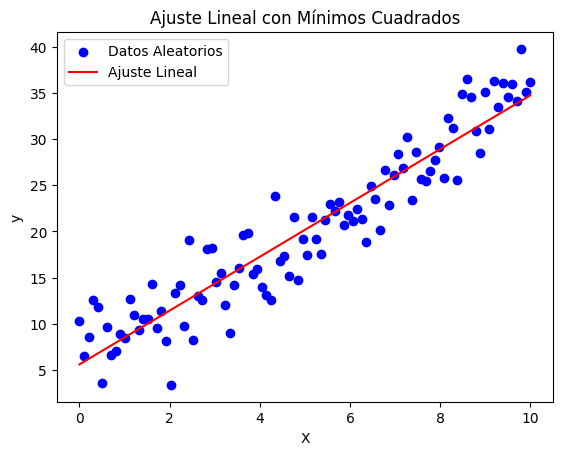

In [232]:
# Generar datos aleatorios que sigan aproximadamente la línea y = 3x + 5, pero con ruido
np.random.seed(0)  # Esto es para reproducibilidad.

num_points = 100
X = np.linspace(0, 10, 100)  # 100 puntos desde 0 hasta 10
y = 3 * X + 5 + np.random.normal(0, 3, num_points)  # 3x + 5 + ruido

# Construir la matriz de diseño 
A = np.zeros((len(X), 2))
A[:, 0] = X
A[:, 1] = 1

# Usar la fórmula matricial para mínimos cuadrados
A = np.linalg.inv(A.T @ A) @ A.T @ y

# Extraer los coeficientes
m = A[0]
b = A[1]

print(f"la pendiente es: {m}")
print(f"el intercepto es: {b} \n")

print(f"y = {m:.3f}x + {b:.3f}")

# Gráfico para visualizar
plt.scatter(X, y, color='blue', label='Datos Aleatorios')
plt.plot(X, m*X + b, color='red', label='Ajuste Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste Lineal con Mínimos Cuadrados')
plt.show()

## Ejercicio 4

Considera la función $f(x, y) = \sin(x) + \cos(y)$ en el dominio $\mathbb{R}^2$. Encuentra el valor de $x$ y $y$ que maximiza la derivada direccional de $f$ en la dirección del vector unitario $(1, 1)$ en el punto $(\pi/4, \pi/4)$.

In [233]:
# Definición de la función gradient
def gradient(f, x, n):
    g = sp.zeros(n, 1)
    for i in range(0, n):
        g[i] = sp.diff(f, x[i])
    return g

# Definir las variables
x, y = sp.symbols('x y')
vars = [x, y]

# Definir la función f
f = sp.sin(x) + sp.cos(y)

# Paso 1: Calcula el gradiente de f usando tu función
grad_f = gradient(f, vars, 2)
display(Latex('$ \\nabla f(x,y) =' + sp.latex(grad_f) + '$'))

# Paso 2: Evaluar el gradiente en el punto (pi/4, pi/4)
grad_f_val = grad_f.subs({x: sp.pi/4, y: sp.pi/4})

# Paso 3: Encontrar la derivada direccional
u = sp.Matrix([1, 1]).normalized()
D_u_f = grad_f_val.dot(u)

print(f"Derivada direccional en el punto (π/4, π/4) en la dirección (1,1) es: {D_u_f}")


<IPython.core.display.Latex object>

Derivada direccional en el punto (π/4, π/4) en la dirección (1,1) es: 0


## Ejercicio 5

Considera la función $f(x) = \sin(x^2)$ en el intervalo $[-1, 1]$. Encuentra los valores de $x$ en los que $f(x)$ alcanza sus máximos y mínimos locales.

In [234]:
# Definir la variable y la función
x = sp.Symbol('x')
f = sp.sin(x**2)

# Encuentra la primera derivada
df = f.diff(x)

# Encuentra los puntos críticos resolviendo f'(x) = 0
critical_points = sp.solve(df, x)

# Filtrar los puntos críticos que están dentro del intervalo [-1,1]
critical_points = [point for point in critical_points if -1 <= point <= 1]

# Encuentra la segunda derivada
ddf = df.diff(x)

# Evalúa la segunda derivada en los puntos críticos para determinar si son máximos o mínimos
max_min = []
for point in critical_points:
    if ddf.subs(x, point) > 0:
        max_min.append((point, f.subs(x, point), "Mínimo"))
    elif ddf.subs(x, point) < 0:
        max_min.append((point, f.subs(x, point), "Máximo"))

# Imprime los resultados
for point, value, nature in max_min:
    print(f"x = {point}, f(x) = {value}, {nature}")


x = 0, f(x) = 0, Mínimo


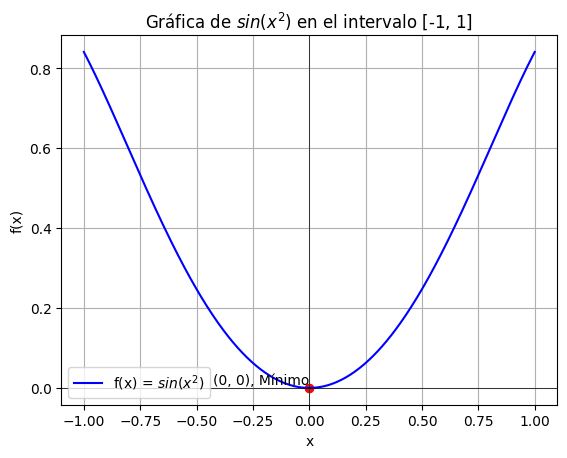

In [235]:
# Grafica la función en el intervalo [-1, 1]
f = sp.lambdify(x, f)
x_vals = np.linspace(-1, 1, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = $sin(x^2)$', color='blue')

for point, value, nature in max_min:
    plt.scatter(point, value, color='red')
    plt.text(point, value, f'({point}, {value}), {nature}', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.title('Gráfica de $sin(x^2)$ en el intervalo [-1, 1]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

## Ejercicio 6

Considera la función $f(x, y) = x^3 + 2y^3 - 3xy^2$ en el plano $\mathbb{R}^2$. Encuentra todos los puntos críticos y utiliza las condiciones de primer y segundo orden para determinar su naturaleza.

In [236]:
def hessian(f, x, n):
    # Esta función devuelve la matriz hessiana de f
    H = sp.zeros(n)
    for i in range(0,n):
        for j in range(0,n):
            H[i, j] = sp.diff(f, x[i], x[j])
    return H

# Definimos la función
x, y = sp.symbols('x y')
f = x**3 + 2*y**3 - 3*x*y**2

# Calculamos las primeras derivadas
f_x = sp.diff(f, x)
f_y = sp.diff(f, y)

# Encuentra los puntos críticos
critical_points = sp.solve([f_x, f_y], (x, y))

# Matriz hessiana
H = hessian(f, (x,y),2)
display(Latex('$ \\nabla^2 f(x,y) =' + sp.latex(H) + '$'))

# Determinar la naturaleza de cada punto crítico
for point in critical_points:
    D_val = H.det().subs({x: point[0], y: point[1]})
    f_xx_val = H[0,0].subs({x: point[0], y: point[1]})
    
    if D_val > 0:
        if f_xx_val > 0:
            nature = "mínimo local"
        else:
            nature = "máximo local"
    elif D_val < 0:
        nature = "punto silla"
    else:
        nature = "criterio donde el Hessiano no decide"
    
    print(f"El punto {point} es un {nature}.")

<IPython.core.display.Latex object>

El punto (0, 0) es un criterio donde el Hessiano no decide.
El punto (y, y) es un criterio donde el Hessiano no decide.


## Ejercicio 7

Utiliza el teorema de Taylor para aproximar el valor de $e^{0.1}$ utilizando la función $f(x) = e^x$ centrada en $a = 0$ y encuentra una cota superior para el error de la aproximación.

In [237]:
# Definimos la variable y la función
x = sp.Symbol('x')
f = sp.exp(x)

n = 4 # Vamos a usar una expansión hasta el término de grado 4

# Generamos la serie de Taylor centrada en 0 y hasta el término x^4
taylor_series = f.series(x, 0, n+1).removeO()

# Mostramos la serie de Taylor y la aproximación
display(Latex(f"Serie de Taylor de $e^x$ centrada en 0 hasta el término $x^4$: "))
display(Latex(f"$f(x) \\approx {sp.latex(taylor_series)}$ "))


# Calculamos la aproximación para x = 0.1
approximation = taylor_series.subs(x, 0.1)
display(Latex(f"Aproximación de e^0.1 usando el polinomio de Taylor: {approximation}"))


# valor real
real_value = sp.exp(0.1)
display(Latex(f"Valor real de e^0.1: {real_value}"))


# error real
error = abs(real_value - approximation)
display(Latex(f"Error real: {error}"))


# Dado que f^(n+1)(c) = e^c y e^c es maximo para e^(0.1)
# Estimación del error usando el teorema de Taylor
R_n = (sp.exp(0.1)) /sp.factorial(n+1) * ((0.1)**(n+1))
display(Latex(f"Cota superior para el error: {R_n}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

**Nota:** Por favor incluir en el archivo que contenga la solución los script, funciones, gráficas, código y cualquier otro elemento utilizado. No coloque respuestas sin justificación, muestre todo los desarrollos.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte.